In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

df_final = pd.read_csv(r"C:\Users\coys7\Desktop\krisha\final_2")
df_exp = pd.read_csv(r"C:\Users\coys7\Desktop\krisha\final_21")



In [46]:
df_exp = df_exp.dropna(axis=0)


df_exp['Year']=df_exp['Year'].str.replace('г.п.', '', regex=True)
df_exp['Year']=df_exp['Year'].str.replace('[', '', regex=True)
df_exp['Year']=df_exp['Year'].str.replace(']', '', regex=True)
df_exp['Year']=df_exp['Year'].str.replace("'", '', regex=True)
df_exp['Type']=df_exp['Type'].str.replace('[', '', regex=True)
df_exp['Type']=df_exp['Type'].str.replace(']', '', regex=True)
df_exp['Type']=df_exp['Type'].str.replace("'", '', regex=True)
df_exp['District']=df_exp['District'].str.replace("'", '', regex=True)
df_exp['District']=df_exp['District'].str.replace('[', '', regex=True)
df_exp['District']=df_exp['District'].str.replace(']', '', regex=True)
df_exp['prices']=df_exp['prices'].str.replace('[\xa0]', '', regex=True)
df_exp['prices']=df_exp['prices'].str.replace('〒', '', regex=True)
df_exp['Floor']=df_exp['Floor'].str.replace(r'/[0-9]+[0-9]', '', regex=True)
df_exp['Floor']=df_exp['Floor'].str.replace(r'/[0-9]', '', regex=True)
df_exp = df_exp.dropna(axis=0)

filter=df_exp['Type'].isin(["монолитный дом", "панельный дом", "кирпичный дом"])

df_exp[filter]

df_exp=df_exp[filter]

df_exp = df_exp.drop_duplicates()

filter_2=df_exp['District'].isin(["Бостандыкский р-н", "Ауэзовский р-н", "Наурызбайский р-н", "Алмалинский р-н", "Алатауский р-н", "Турксибский р-н", "Медеуский р-н", "Жетысуский р-н"])

df_exp=df_exp[filter_2]

#categorizing Type and District into numbers
le= LabelEncoder()

Type_label=le.fit_transform(df_exp['Type'])
df_exp['Type_code'] = Type_label
df_exp['Type_code'].value_counts()

District_label =le.fit_transform(df_exp['District'])
df_exp['District_code'] = District_label
df_exp['District_code'].value_counts()

df_exp['Floor'] = pd.to_numeric(df_exp['Floor'])
df_exp['Year'] = pd.to_numeric(df_exp['Year'])
df_exp['prices'] = pd.to_numeric(df_exp['prices'])
df_exp.dtypes

address           object
prices             int64
Rooms              int64
Square_in_m^2    float64
Floor              int64
Type              object
Year               int64
District          object
Type_code          int32
District_code      int32
dtype: object

35000000     408
30000000     350
45000000     313
40000000     292
25000000     287
            ... 
10990000       1
194999999      1
23000500       1
51990000       1
13100000       1
Name: prices, Length: 1152, dtype: int64

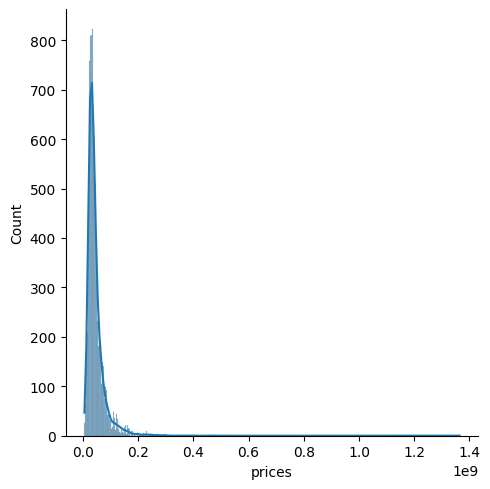

In [47]:
sns.displot(df_exp['prices'], kde=True)
df_exp['prices'].value_counts()

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split

y = df_exp.prices

features = ['Rooms','Square_in_m^2','Floor', 'Type_code', 'Year', 'District_code']
x=df_exp[features]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)


rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_x, train_y)
rf_prediction = rf_model.predict(val_x)

rf_val_mae = mean_absolute_error (rf_prediction, val_y)

print("MAE of Random Forest Regressor on test set: {:.3f}".format(rf_val_mae))

MAE of Random Forest Regressor on test set: 7190677.781


In [65]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(rf_prediction, val_y)
print("MSE Random Forest Regressor: {:.3f}".format(MSE))

RMSE = mean_squared_error(rf_prediction, val_y, squared=False)
print ("RMSE Random Forest Regressor: {:.3f}".format(RMSE))

MSE Random Forest Regressor: 506638383629115.188
RMSE Random Forest Regressor: 22508629.093


In [51]:
from sklearn.metrics import mean_squared_log_error
MSLE_rf = mean_squared_log_error(rf_prediction, val_y)
print("MSLE Random Forest Regressor: {:.4%}".format(MSLE_rf))

MSLE Random Forest Regressor: 3.5231%


In [52]:
# train_x.dtypes
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_x, train_y)
xgb_prediction = xgb.predict(val_x)
xgb_val_mae = mean_absolute_error(xgb_prediction, val_y)
print("MAE XGBoost: {:.3f}".format(xgb_val_mae))
MSLE_xgb = mean_squared_log_error(xgb_prediction, val_y)
print("MSLE XGBoost: {:.4%}".format(MSLE_xgb))

MAE XGBoost: 7288501.150
MSLE Random Forest Regressor: 3.5789%


In [53]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)
gnb_prediction = gnb.predict(val_x)
gnb_prediction_float = np.array(gnb_prediction, dtype=float)

gnb_val_mae = mean_absolute_error(gnb_prediction_float, val_y)
print("MAE Gaussian Naive Bayes: {:.3f}".format(gnb_val_mae))

MAE Gaussian NB: 15056963.050


In [54]:
lr =LogisticRegression(max_iter = 1000)
lr.fit(train_x, train_y)
lr_prediction = lr.predict(val_x)
lr_prediction_float = np.array(lr_prediction, dtype=float)

lr_val_mae = mean_absolute_error(lr_prediction_float, val_y)
print("MAE Logistic Regression: {:.3f}".format(lr_val_mae))

MAE Logistic Regression: 11160090.848


c:\Users\coys7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(train_x,train_y)
dt_prediction = dt.predict(val_x)

dt_val_mae = mean_absolute_error(dt_prediction,val_y)
print("MAE Decision Tree Classifier: {:.3f}".format(dt_val_mae))

MAE Decision Tree Classifier: 9384390.323


In [56]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
knn_prediction = knn.predict(val_x)

knn_val_mae = mean_absolute_error(knn_prediction, val_y)
print("MAE K-nearest Neighbors: {:.3f}".format(knn_val_mae))

MAE K-nearest Neighbors: 11932843.318


In [57]:
svc = SVC (probability=True)
svc.fit(train_x,train_y)
svc_prediction = svc.predict(val_x)
svc_prediction_float = np.array(svc_prediction, dtype=float)

svc_val_mae = mean_absolute_error(svc_prediction,val_y)
print("MAE Support Vector Classification: {:.3f}".format(svc_val_mae))

MAE Support Vector Classification: 20282047.914


In [62]:
models = ["Random Forest Regressor", "XGBoost", "Gaussian Naive Bayes", "Logistic Regression", "Decision Tree Regressor", "K-nearest Neighbors", "Support Vector"]
tests_mae =[rf_val_mae, xgb_val_mae, gnb_val_mae, lr_val_mae, dt_val_mae, knn_val_mae, svc_val_mae]
compare_models = pd.DataFrame({"Algorithms": models, "MAE": tests_mae})
compare_models.sort_values(by = "MAE", ascending=True)

,Algorithms,MAE
0,Random Forest Regressor,7.190678e+06
1,XGBoost,7.288501e+06
4,Decision Tree Regressor,9.384390e+06
3,Logistic Regression,1.116009e+07
5,K-nearest Neighbors,1.193284e+07
2,Gaussian Naive Bayes,1.505696e+07
6,Support Vector,2.028205e+07


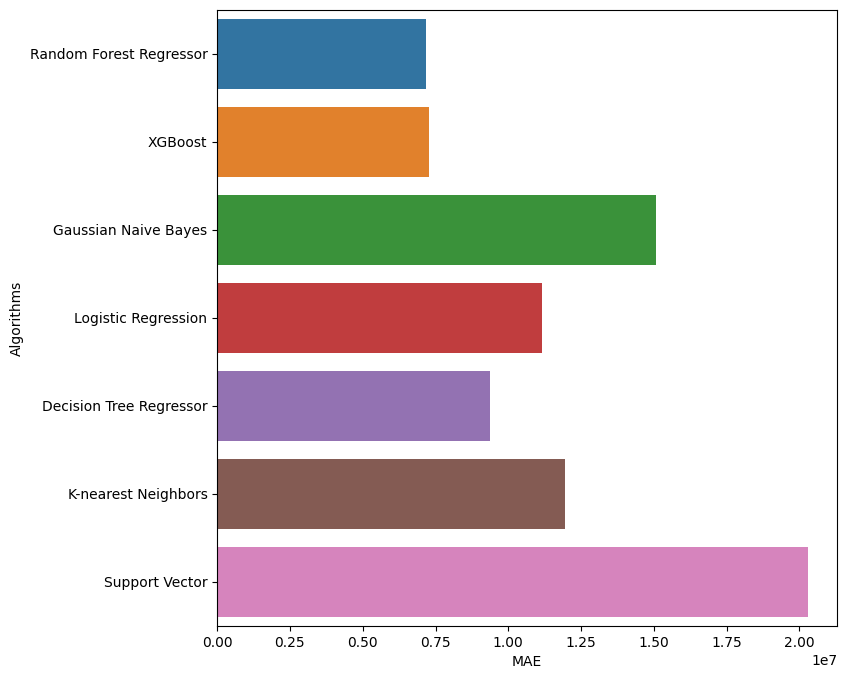

In [63]:
import matplotlib.pyplot as plt
plt.figure (figsize =(8,8))
sns.barplot(x = "MAE", y = "Algorithms", data = compare_models)
plt.show()

In [64]:
from sklearn.metrics import r2_score
score = r2_score(rf_prediction, val_y)
print (score)


0.5308461897844454


In [69]:
val_y1=val_y.copy()
gross =[]
for i in rf_prediction:
    gross.append(i)
df=pd.DataFrame(data=gross)
df = df.set_index(val_y.index)
df.rename(columns={0: "predicted"}, inplace=True)
df1=pd.concat([val_y1, df], axis=1)
df1.columns = ["true", "predicted"]
df1.head()

,true,predicted
9144,65000000,5.423100e+07
4562,33500000,3.644650e+07
11179,55700000,4.881800e+07
12613,18000000,2.145595e+07
7862,59000000,5.718996e+07


In [71]:
df1['diff'] = df1['predicted'] - df1['true']
pd.DataFrame({'Count':[(df1['diff']<0).sum(),(df1['diff']==0).sum(),(df1['diff']>0).sum()]},columns=["Count"], index = ['Underestimation', 'Exact Estimation', 'Overestimation'])


,Count
Underestimation,1641
Exact Estimation,1
Overestimation,1960
